In [1]:
import datetime
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Deep Learning
import tensorflow
from typing import Dict, List, Tuple, Sequence

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split

2023-08-05 12:51:12.835304: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 12:51:12.875203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 12:51:13.115560: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 12:51:13.117545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 12:51:14.638232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import pandas as pd
file_path="~/code/Agermita/intelligent_network_expansion/raw_data/data_finale.csv"

processed_data = pd.read_csv(file_path, sep=',')
processed_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'eNodeB identity', 'Cell ID',
       'Trafic LTE.float', 'L.Traffic.ActiveUser.Avg.float',
       'L.Traffic.User.Avg.float', 'DL throughput_GRP.float',
       'DL PRB Usage.float', 'eNodeB_identifier_int',
       'Cell FDD TDD Indication_CELL_FDD', 'Cell FDD TDD Indication_CELL_TDD',
       'Downlink EARFCN_Band_1', 'Downlink EARFCN_Band_2',
       'Downlink EARFCN_Band_3', 'Downlink EARFCN_Band_4',
       'Downlink EARFCN_Band_5', 'Downlink bandwidth_CELL_BW_N100',
       'Downlink bandwidth_CELL_BW_N50', 'LTECell Tx and Rx Mode_1T1R',
       'LTECell Tx and Rx Mode_2T2R', 'LTECell Tx and Rx Mode_2T4R',
       'LTECell Tx and Rx Mode_4T4R', 'LTECell Tx and Rx Mode_8T8R',
       'City_City_1', 'City_City_3', 'City_City_4', 'City_City_5',
       'City Type_Rural', 'City Type_Urbain', 'City Type_Urbain dense'],
      dtype='object')

In [3]:
processed_data['Trafic LTE.float'].mean()

0.163609031546371

In [4]:
processed_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Date,eNodeB identity,Cell ID,Trafic LTE.float,L.Traffic.ActiveUser.Avg.float,L.Traffic.User.Avg.float,DL throughput_GRP.float,DL PRB Usage.float,eNodeB_identifier_int,Cell FDD TDD Indication_CELL_FDD,Cell FDD TDD Indication_CELL_TDD,Downlink EARFCN_Band_1,Downlink EARFCN_Band_2,Downlink EARFCN_Band_3,Downlink EARFCN_Band_4,Downlink EARFCN_Band_5,Downlink bandwidth_CELL_BW_N100,Downlink bandwidth_CELL_BW_N50,LTECell Tx and Rx Mode_1T1R,LTECell Tx and Rx Mode_2T2R,LTECell Tx and Rx Mode_2T4R,LTECell Tx and Rx Mode_4T4R,LTECell Tx and Rx Mode_8T8R,City_City_1,City_City_3,City_City_4,City_City_5,City Type_Rural,City Type_Urbain,City Type_Urbain dense
0,0,0,2022-08-17,146007,1,-0.109745,-0.078283,0.728584,1.178462,-0.436713,37377793,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1,2022-08-17,146007,2,0.064398,0.087395,0.676617,0.204076,0.047935,37377794,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,2,2022-08-17,146007,3,0.023172,-0.091539,0.381226,1.515478,-0.379564,37377795,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
processed_data['Date'] = pd.to_datetime(processed_data['Date'], format='%Y-%m-%d')
processed_data.dtypes

Unnamed: 0.1                                 int64
Unnamed: 0                                   int64
Date                                datetime64[ns]
eNodeB identity                              int64
Cell ID                                      int64
Trafic LTE.float                           float64
L.Traffic.ActiveUser.Avg.float             float64
L.Traffic.User.Avg.float                   float64
DL throughput_GRP.float                    float64
DL PRB Usage.float                         float64
eNodeB_identifier_int                        int64
Cell FDD TDD Indication_CELL_FDD           float64
Cell FDD TDD Indication_CELL_TDD           float64
Downlink EARFCN_Band_1                     float64
Downlink EARFCN_Band_2                     float64
Downlink EARFCN_Band_3                     float64
Downlink EARFCN_Band_4                     float64
Downlink EARFCN_Band_5                     float64
Downlink bandwidth_CELL_BW_N100            float64
Downlink bandwidth_CELL_BW_N50 

In [6]:
processed_data.drop('Unnamed: 0', axis=1, inplace=True)
processed_data.drop('Unnamed: 0.1', axis=1, inplace=True)

In [7]:
processed_data.head(4)

,Date,eNodeB identity,Cell ID,Trafic LTE.float,L.Traffic.ActiveUser.Avg.float,L.Traffic.User.Avg.float,DL throughput_GRP.float,DL PRB Usage.float,eNodeB_identifier_int,Cell FDD TDD Indication_CELL_FDD,Cell FDD TDD Indication_CELL_TDD,Downlink EARFCN_Band_1,Downlink EARFCN_Band_2,Downlink EARFCN_Band_3,Downlink EARFCN_Band_4,Downlink EARFCN_Band_5,Downlink bandwidth_CELL_BW_N100,Downlink bandwidth_CELL_BW_N50,LTECell Tx and Rx Mode_1T1R,LTECell Tx and Rx Mode_2T2R,LTECell Tx and Rx Mode_2T4R,LTECell Tx and Rx Mode_4T4R,LTECell Tx and Rx Mode_8T8R,City_City_1,City_City_3,City_City_4,City_City_5,City Type_Rural,City Type_Urbain,City Type_Urbain dense
0,2022-08-17,146007,1,-0.109745,-0.078283,0.728584,1.178462,-0.436713,37377793,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2022-08-17,146007,2,0.064398,0.087395,0.676617,0.204076,0.047935,37377794,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2022-08-17,146007,3,0.023172,-0.091539,0.381226,1.515478,-0.379564,37377795,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2022-08-17,146603,1,0.630428,0.341858,0.603780,0.114187,0.345800,37530369,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
def replace_missing_dates(df, start_date, end_date) -> pd.DataFrame :
    missing_date=pd.date_range(start = start_date, end = end_date ).difference(df["Date"])
    date={}
    df_new=df.copy()
    if(len(missing_date)>0):
        for i in range(0,len(missing_date)):
            data={'Date': missing_date[i], 
                    'eNodeB identity': df['eNodeB identity'][0], 
                    'Cell ID' : df['Cell ID'][0],
                    'Trafic LTE.float' :float(0),
                    'L.Traffic.ActiveUser.Avg.float':float(0), 
                    'L.Traffic.User.Avg.float' :float(0),
                    'DL throughput_GRP.float':float(0), 
                    'DL PRB Usage.float':float(0), 
                    'City_City_1': df['City_City_1'][0],
                    'City_City_3': df['City_City_3'][0], 
                    'City_City_4': df['City_City_4'][0], 
                    'City_City_5': df['City_City_5'][0],
                    'LTECell Tx and Rx Mode_1T1R': df['LTECell Tx and Rx Mode_1T1R'][0],
                    'LTECell Tx and Rx Mode_2T2R': df['LTECell Tx and Rx Mode_2T2R'][0],
                    'LTECell Tx and Rx Mode_2T4R': df['LTECell Tx and Rx Mode_2T4R'][0],
                    'LTECell Tx and Rx Mode_4T4R': df['LTECell Tx and Rx Mode_4T4R'][0],
                    'LTECell Tx and Rx Mode_8T8R': df['LTECell Tx and Rx Mode_8T8R'][0], 
                    'Downlink bandwidth_CELL_BW_N100': df['Downlink bandwidth_CELL_BW_N100'][0],
                    'Downlink bandwidth_CELL_BW_N50': df['Downlink bandwidth_CELL_BW_N50'][0], 
                    'Downlink EARFCN_Band_1': df['Downlink EARFCN_Band_1'][0],
                    'Downlink EARFCN_Band_2': df['Downlink EARFCN_Band_2'][0],
                    'Downlink EARFCN_Band_3': df['Downlink EARFCN_Band_3'][0],
                    'Downlink EARFCN_Band_4': df['Downlink EARFCN_Band_4'][0],
                    'Downlink EARFCN_Band_5': df['Downlink EARFCN_Band_5'][0],
                    'eNodeB_identifier_int': df['eNodeB_identifier_int'][0],
                    'Cell FDD TDD Indication_CELL_FDD': df['Cell FDD TDD Indication_CELL_FDD'][0],
                    'Cell FDD TDD Indication_CELL_TDD': df['Cell FDD TDD Indication_CELL_TDD'][0],
                    'City Type_Rural': df['City Type_Rural'][0],
                    'City Type_Urbain': df['City Type_Urbain'][0],
                    'City Type_Urbain dense': df['City Type_Urbain dense'][0]          
                    }
            print (data)
            new_row=pd.DataFrame([data])
            df_new=pd.concat([df_new,new_row])
            df_new.sort_values('Date')
    return df_new

In [9]:
def replace_missing_dates_all(df) -> pd.DataFrame :
    cells=df[["eNodeB identity",'Cell ID']]
    cells=cells.drop_duplicates()
    start_date=df['Date'].min()
    end_date=df['Date'].max()

    for index, row in cells.iterrows():
        df_cell=df[(df["eNodeB identity"]==row[0]) & (df["Cell ID"]==row[1])]
        df_cell=df_cell.reset_index(drop=True)

        df_cell=replace_missing_dates(df_cell, start_date, end_date)
        if index==0:
            df_new=df_cell
        elif index<2000:
            df_new=pd.concat([df_new,df_cell])
        else:
            break

    return df_new

In [10]:
df_processed_completed=replace_missing_dates_all(processed_data)
df_processed_completed.shape

{'Date': Timestamp('2022-08-26 00:00:00'), 'eNodeB identity': 146305, 'Cell ID': 1, 'Trafic LTE.float': 0.0, 'L.Traffic.ActiveUser.Avg.float': 0.0, 'L.Traffic.User.Avg.float': 0.0, 'DL throughput_GRP.float': 0.0, 'DL PRB Usage.float': 0.0, 'City_City_1': 0.0, 'City_City_3': 1.0, 'City_City_4': 0.0, 'City_City_5': 0.0, 'LTECell Tx and Rx Mode_1T1R': 0.0, 'LTECell Tx and Rx Mode_2T2R': 1.0, 'LTECell Tx and Rx Mode_2T4R': 0.0, 'LTECell Tx and Rx Mode_4T4R': 0.0, 'LTECell Tx and Rx Mode_8T8R': 0.0, 'Downlink bandwidth_CELL_BW_N100': 1.0, 'Downlink bandwidth_CELL_BW_N50': 0.0, 'Downlink EARFCN_Band_1': 1.0, 'Downlink EARFCN_Band_2': 0.0, 'Downlink EARFCN_Band_3': 0.0, 'Downlink EARFCN_Band_4': 0.0, 'Downlink EARFCN_Band_5': 0.0, 'eNodeB_identifier_int': 37454081, 'Cell FDD TDD Indication_CELL_FDD': 1.0, 'Cell FDD TDD Indication_CELL_TDD': 0.0, 'City Type_Rural': 0.0, 'City Type_Urbain': 1.0, 'City Type_Urbain dense': 0.0}
{'Date': Timestamp('2022-08-26 00:00:00'), 'eNodeB identity': 146305,

(401580, 30)

format the dataframe global to X with 3 dimensions X.shape=(number of cell, number of days, number of features)

In [11]:
df_processed_completed.columns

Index(['Date', 'eNodeB identity', 'Cell ID', 'Trafic LTE.float',
       'L.Traffic.ActiveUser.Avg.float', 'L.Traffic.User.Avg.float',
       'DL throughput_GRP.float', 'DL PRB Usage.float',
       'eNodeB_identifier_int', 'Cell FDD TDD Indication_CELL_FDD',
       'Cell FDD TDD Indication_CELL_TDD', 'Downlink EARFCN_Band_1',
       'Downlink EARFCN_Band_2', 'Downlink EARFCN_Band_3',
       'Downlink EARFCN_Band_4', 'Downlink EARFCN_Band_5',
       'Downlink bandwidth_CELL_BW_N100', 'Downlink bandwidth_CELL_BW_N50',
       'LTECell Tx and Rx Mode_1T1R', 'LTECell Tx and Rx Mode_2T2R',
       'LTECell Tx and Rx Mode_2T4R', 'LTECell Tx and Rx Mode_4T4R',
       'LTECell Tx and Rx Mode_8T8R', 'City_City_1', 'City_City_3',
       'City_City_4', 'City_City_5', 'City Type_Rural', 'City Type_Urbain',
       'City Type_Urbain dense'],
      dtype='object')

In [94]:
import numpy as np
def create_X_y(df) ->np.array :
    cells=df[["eNodeB identity",'Cell ID','eNodeB_identifier_int']]
    cells=cells.drop_duplicates()
    start_date=df['Date'].min()
    end_date=df['Date'].max()
    print (cells.shape)
    data=[]
    data_y=[]
    for index, row in cells.iterrows():
        df_cell=df[(df["eNodeB identity"]==row[0]) & (df["Cell ID"]==row[1])]
        df_cell=df_cell.reset_index(drop=True)
        
        #df_cell=replace_missing_dates(df_cell, start_date, end_date)
        """ for modeling, the X and y should not contain sequences identty (eNodeB id and cell id)"""
        df_cell.drop('eNodeB identity', axis=1, inplace=True)
        df_cell.drop('Cell ID', axis=1, inplace=True)
        df_cell.drop('Date', axis=1, inplace=True)
        df_cell.drop('eNodeB_identifier_int', axis=1, inplace=True)
        """---------------------"""
        df_cell_y=df_cell['Trafic LTE.float']
        
        data.append(df_cell)
        data_y.append(df_cell_y)

    print (len(data))


    X=np.array(data)
    y=np.array(data_y)
    y=np.expand_dims(np.array(y), axis=2)
    cells=cells.reset_index(drop=True)
    return cells, X , y

In [ ]:
import numpy as np
def create_X_y(df) ->np.array :
    cells=df[["eNodeB identity",'Cell ID','eNodeB_identifier_int']]
    cells=cells.drop_duplicates()
    start_date=df['Date'].min()
    end_date=df['Date'].max()
    print (cells.shape)
    data=[]
    data_y=[]
    for index, row in cells.iterrows():
        df_cell=df[(df["eNodeB identity"]==row[0]) & (df["Cell ID"]==row[1])]
        df_cell=df_cell.reset_index(drop=True)
        
        #df_cell=replace_missing_dates(df_cell, start_date, end_date)
        """ for modeling, the X and y should not contain sequences identty (eNodeB id and cell id)"""
        df_cell.drop('eNodeB identity', axis=1, inplace=True)
        df_cell.drop('Cell ID', axis=1, inplace=True)
        df_cell.drop('Date', axis=1, inplace=True)
        df_cell.drop('eNodeB_identifier_int', axis=1, inplace=True)
        """---------------------"""
        df_cell_y=df_cell['Trafic LTE.float']
        
        data.append(df_cell)
        data_y.append(df_cell_y)

    print (len(data))


    X=np.array(data)
    y=np.array(data_y)
    y=np.expand_dims(np.array(y), axis=2)
    cells=cells.reset_index(drop=True)
    return cells, X , y

In [13]:
cells,X,y=create_X_y(df_processed_completed)

(1164, 3)
1164


In [14]:
X.shape, y.shape

((1164, 345, 26), (1164, 345, 1))

In [15]:
def split_train_test(X,y, ratio=0.8) ->tuple:

    X_train, X_test = np.split(X, [int(ratio*len(X))])
    y_train, y_test = np.split(y, [int(ratio*len(y))])
    return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test=split_train_test(X,y, ratio=0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((931, 345, 26), (233, 345, 26), (931, 345, 1), (233, 345, 1))

In [17]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Deep Learning
import tensorflow
from typing import Dict, List, Tuple, Sequence

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split

In [18]:
def initialize_model(input_shape: tuple, output_length) -> models:
    #output_length = y_train.shape[1]
    #input_shape =(X.shape[1],X.shape[2])
    """
    Initialize the Neural Network with random weights
    """

    model = models.Sequential()
     ## 1.1 - Recurrent Layer
    model.add(layers.Masking(mask_value=0.0, input_shape=input_shape))
    
    model.add(layers.GRU(units=64,
                        activation='relu'
                        ))
    ## 1.2 - Hidden Dense Layers
    """
    model.add(layers.Dense(32, activation="relu", kernel_regularizer = L1L2(l1=0.05, l2=0.05)))
    model.add(layers.Dropout(rate=0.5))
    """

    ## 1.2 - Predictive Dense Layers

    model.add(layers.Dense(output_length, activation='linear'))

    return model


def compile_model(model: models) -> models:
    """
    Compile the Neural Network
    """

    # 2 - Compiler
    # ======================
    initial_learning_rate = 0.01

    #lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.5)

    #adam = optimizers.Adam(learning_rate=initial_learning_rate)
    #model.compile(loss='mse', optimizer="adam", metrics=["mae"])
    model.compile(loss='mse', optimizer="adam", metrics=['mae', 'mape'])
    return model

def train_model(
        model: models,
        X: np.ndarray,
        y: np.ndarray,
        patience=2,
        validation_data=None, # overrides validation_split
        validation_split_rate=0.3
    ) -> Tuple[tensorflow.keras.Model, dict]:
    """
    Fit the model and return a tuple (fitted_model, history)
    """
     # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "loss",
                      patience = patience,
                      mode = "min",
                      restore_best_weights = True)


    history = model.fit(X, y,
                        validation_split=validation_split_rate,    
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = 1)

    return model, history

In [19]:
input_shape =(X_train.shape[1],X_train.shape[2])
output_length = y_train.shape[1]
input_shape, output_length

((345, 26), 345)

In [20]:
model=initialize_model(input_shape, output_length)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 345, 26)           0         
                                                                 
 gru (GRU)                   (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 345)               22425     
                                                                 
Total params: 40089 (156.60 KB)
Trainable params: 40089 (156.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model=compile_model(model)

In [23]:
model, history=train_model(
        model,
        X_train,
        y_train,
        2,
        None, # don't use validation data, use validation split rate
        0.3
    )

Epoch 1/50
21/21 [==============================] - 6s 185ms/step - loss: 0.5956 - mae: 0.6039 - mape: 3534.8982 - val_loss: 0.5541 - val_mae: 0.5571 - val_mape: 93795.7891
Epoch 2/50
21/21 [==============================] - 3s 147ms/step - loss: 0.4199 - mae: 0.5092 - mape: 7690.8696 - val_loss: 0.4024 - val_mae: 0.4738 - val_mape: 156258.4219
Epoch 3/50
21/21 [==============================] - 3s 154ms/step - loss: 0.2580 - mae: 0.3774 - mape: 29585.6230 - val_loss: 0.3211 - val_mae: 0.3954 - val_mape: 184139.6875
Epoch 4/50
21/21 [==============================] - 3s 140ms/step - loss: 0.2294 - mae: 0.3466 - mape: 39150.3945 - val_loss: 0.3088 - val_mae: 0.3849 - val_mape: 170854.7656
Epoch 5/50
21/21 [==============================] - 3s 151ms/step - loss: 0.2127 - mae: 0.3290 - mape: 46354.0938 - val_loss: 0.2737 - val_mae: 0.3661 - val_mape: 224281.0312
Epoch 6/50
21/21 [==============================] - 3s 159ms/step - loss: 0.1831 - mae: 0.3042 - mape: 54177.1602 - val_loss: 0.

In [24]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

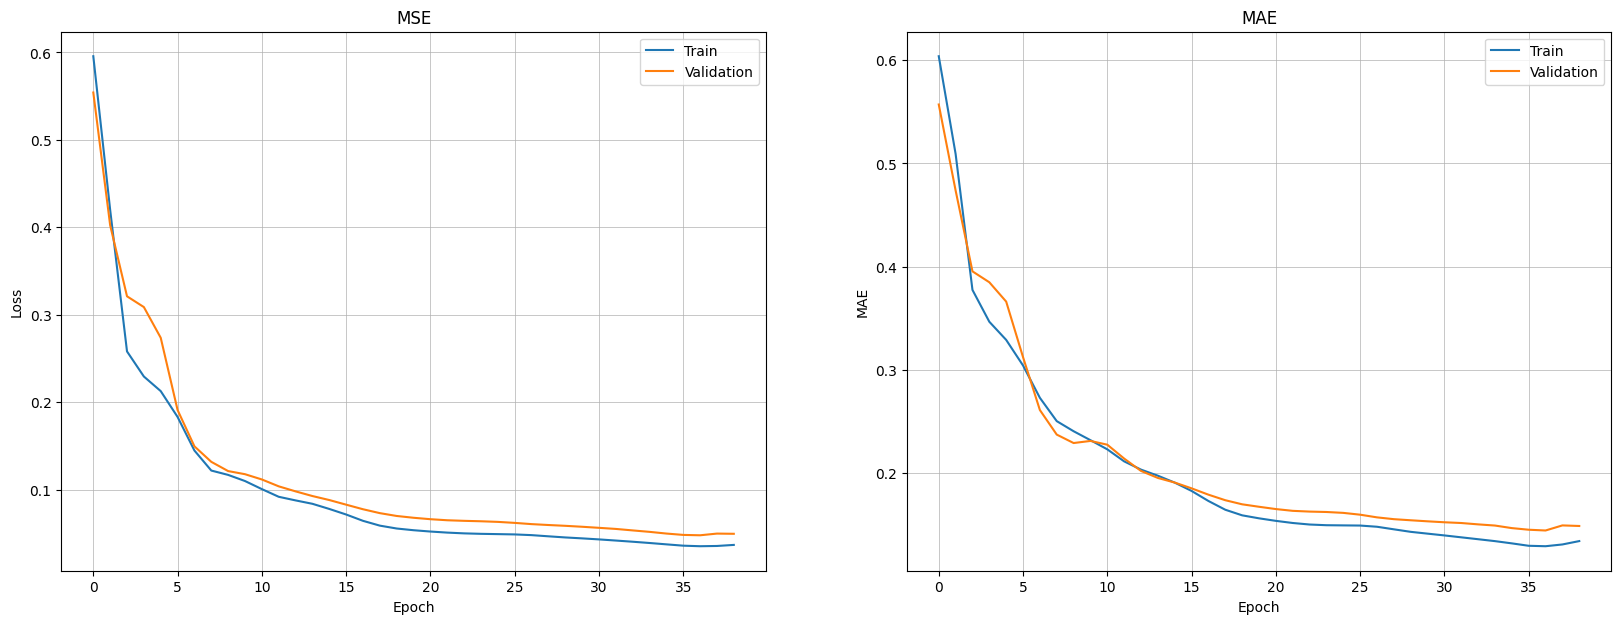

In [25]:
plot_history(history);

In [26]:
res = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 37ms/step - loss: 0.0319 - mae: 0.1236 - mape: 1119222.1250


In [27]:
res

[0.03185592219233513, 0.12359868735074997, 1119222.125]

In [54]:
y_pred=model.predict(X)

37/37 [==============================] - 2s 40ms/step


In [41]:
start_date=processed_data['Date'].min()
end_date=processed_data['Date'].max()
end_date_2=end_date+datetime.timedelta(days=y_pred.shape[1])
dates=pd.date_range(start = start_date, end = end_date_2)

y_reshaped_2d=y
y_reshaped_2d=y_reshaped_2d.reshape(-1, y.shape[1])
list_y_pred=pd.DataFrame(y_pred)
list_y=pd.DataFrame(y_reshaped_2d)
cells=cells.reset_index(drop=True) # to be deleted after

cell_data=pd.concat([list_y,list_y_pred],axis=1, ignore_index=True, sort=False)
cell_data_final=pd.concat([cells,cell_data],axis=1, sort=False)

columns=['eNodeB identity','Cell ID','eNodeB_identifier_int']
comunms_all=columns+(list(dates))
cell_data_final.columns=comunms_all

(1164, 345, 1)

In [97]:
cell_data_final2=cell_data_final.melt(id_vars=['eNodeB identity','Cell ID','eNodeB_identifier_int'], 
        var_name="Date", 
        value_name="Value")
cell_data_final2

,eNodeB identity,Cell ID,eNodeB_identifier_int,Date,Value
0,146007,1,37377793,2022-08-17,-0.109745
1,146007,2,37377794,2022-08-17,0.064398
2,146007,3,37377795,2022-08-17,0.023172
3,146603,1,37530369,2022-08-17,0.630428
4,146603,2,37530370,2022-08-17,0.977962
...,...,...,...,...,...
803155,146601,3,37529859,2024-07-06,1.215211
803156,146601,2,37529858,2024-07-06,1.203135
803157,146601,1,37529857,2024-07-06,0.176252
803158,170206,2,43572738,2024-07-06,0.387488


In [101]:
def data_hist_predicted(y, y_pred, cells, start_date, end_date):
    # start_date=processed_data['Date'].min()
    # end_date=processed_data['Date'].max()
    end_date_2=end_date+datetime.timedelta(days=y_pred.shape[1]) 
    dates=pd.date_range(start = start_date, end = end_date_2)
    # reshape the y to the 2d
    y_reshaped_2d=y
    y_reshaped_2d=y_reshaped_2d.reshape(-1, y.shape[1])
    # convert y and y_pred to Dataframe    
    list_y_pred=pd.DataFrame(y_pred)
    list_y=pd.DataFrame(y_reshaped_2d)
    cells=cells.reset_index(drop=True) # to be deleted after
    #concatenate y and y_pred and cell ids
    cell_data=pd.concat([list_y,list_y_pred],axis=1, ignore_index=True, sort=False)
    cell_data_final=pd.concat([cells,cell_data],axis=1, sort=False)
    # rename columns
    columns=['eNodeB identity','Cell ID','eNodeB_identifier_int']
    comunms_all=columns+(list(dates))
    cell_data_final.columns=comunms_all
    cell_data_final.set_index(['eNodeB identity','Cell ID','eNodeB_identifier_int'])
    
    # format the  dataframe to have dates as one column
    cell_data_final2=cell_data_final.melt(id_vars=['eNodeB identity','Cell ID','eNodeB_identifier_int'], 
        var_name="Date", 
        value_name="Trafic")
    
    return cell_data_final2
        
    

In [102]:
start_date=processed_data['Date'].min()
end_date=processed_data['Date'].max()
finale_result=data_hist_predicted(y, y_pred, cells, start_date, end_date)
finale_result

,eNodeB identity,Cell ID,eNodeB_identifier_int,Date,Trafic
0,146007,1,37377793,2022-08-17,-0.109745
1,146007,2,37377794,2022-08-17,0.064398
2,146007,3,37377795,2022-08-17,0.023172
3,146603,1,37530369,2022-08-17,0.630428
4,146603,2,37530370,2022-08-17,0.977962
...,...,...,...,...,...
803155,146601,3,37529859,2024-07-06,1.215211
803156,146601,2,37529858,2024-07-06,1.203135
803157,146601,1,37529857,2024-07-06,0.176252
803158,170206,2,43572738,2024-07-06,0.387488


: 